In [25]:
import pandas as pd
from sklearn import tree, ensemble, metrics
from sklearn.model_selection import train_test_split


df = pd.read_csv('bioresponse.csv')

X = df.drop('Activity', axis=1)
Y = df['Activity']

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

In [41]:

# мелкое дерево решений
clf_sm = tree.DecisionTreeClassifier(max_depth=3, random_state=17)
clf_sm.fit(X_train, y_train)
y_sm_pred = clf_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_sm_pred))

# визуализация
tree.plot_tree(clf_sm)

Доля правильных ответов: 0.738898756660746
Точность: 0.7350157728706624
Полнота: 0.17172968953513004
Значение F1: 0.7601957585644372
Логарифмическая потеря: 9.01823676063234


[Text(0.6056078074433657, 0.9545454545454546, 'X[26] <= 0.5\ngini = 0.495\nsamples = 2625\nvalue = [1183, 1442]'),
 Text(0.36792071197411, 0.8636363636363636, 'X[77] <= 0.037\ngini = 0.417\nsamples = 1264\nvalue = [890, 374]'),
 Text(0.220873786407767, 0.7727272727272727, 'X[1035] <= 0.5\ngini = 0.347\nsamples = 991\nvalue = [770, 221]'),
 Text(0.11245954692556634, 0.6818181818181818, 'X[774] <= 0.417\ngini = 0.273\nsamples = 613\nvalue = [513, 100]'),
 Text(0.09951456310679611, 0.5909090909090909, 'X[214] <= 0.935\ngini = 0.259\nsamples = 603\nvalue = [511, 92]'),
 Text(0.09304207119741101, 0.5, 'X[932] <= 0.042\ngini = 0.249\nsamples = 598\nvalue = [511, 87]'),
 Text(0.059870550161812294, 0.4090909090909091, 'X[190] <= 0.288\ngini = 0.196\nsamples = 463\nvalue = [412, 51]'),
 Text(0.042071197411003236, 0.3181818181818182, 'X[219] <= 0.748\ngini = 0.187\nsamples = 459\nvalue = [411, 48]'),
 Text(0.025889967637540454, 0.22727272727272727, 'X[39] <= 0.023\ngini = 0.178\nsamples = 455\nv

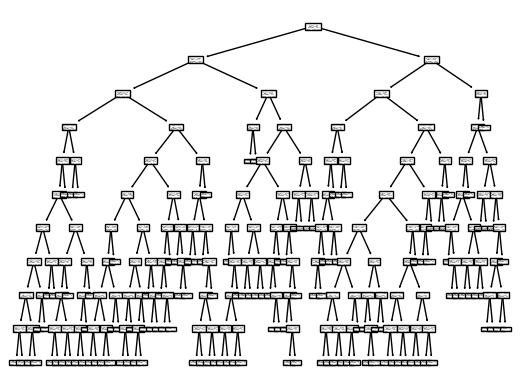

In [31]:
# глубокое дерево решений
clf_deep = tree.DecisionTreeClassifier(max_depth=10, random_state=17)
clf_deep.fit(X_train,y_train)
y_deep_pred = clf_deep.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_deep_pred))
print("Точность:", metrics.precision_score(y_test, y_deep_pred))
print("Полнота:", metrics.completeness_score(y_test, y_deep_pred))
print("Значение F1:", metrics.f1_score(y_test, y_deep_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_deep_pred))

# визуализация
tree.plot_tree(clf_deep)

In [35]:

# случайный лес на мелких деревья
rfc_sm = ensemble.RandomForestClassifier(n_estimators=3, random_state=0)
rfc_sm.fit(X_train, y_train)
y_frc_sm_pred=rfc_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_frc_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_sm_pred))


Accuracy: 0.7015985790408525


In [39]:
# случайный лес на глубоких деревья
rfc_dp = ensemble.RandomForestClassifier(n_estimators=20, random_state=0)
rfc_dp.fit(X_train, y_train)
y_frc_dp_pred=rfc_dp.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_frc_dp_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_dp_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_dp_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_dp_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_dp_pred))

Accuracy: 0.7690941385435168


In [ ]:
# # построение кривых precision recall
# display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
# _ = display.ax_.set_title("Precision-Recall")